In [81]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
import numpy as np

from brokenaxes import brokenaxes

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [82]:
# CSV 파일에 접근
maml_info = pd.read_csv('../MAML_5way_5shot/MAML_5way_5shot_inner_loop_test.csv')
arbiter_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop_test.csv')

# 훈련 정보만 가지고 온다
maml_info_train = maml_info[maml_info['phase']=='val']
arbiter_info_train= arbiter_info[arbiter_info['phase']=='val']

# 1. 정보를 Domain 별로 압축

In [83]:
task_index = 13

In [84]:
maml_info_mini_imagenet = maml_info_train[maml_info_train['current_iter']=='mini_imagenet_full_size']
maml_info_tiered_imagenet = maml_info_train[maml_info_train['current_iter']=='tiered_imagenet']
maml_info_cifar_fs = maml_info_train[maml_info_train['current_iter']=='CIFAR_FS']
maml_info_CUB = maml_info_train[maml_info_train['current_iter']=='CUB']

# 5개씩 행을 묶기 (Task 별로)
maml_info_mini_imagenet = [maml_info_mini_imagenet.iloc[i:i+5] for i in range(0, len(maml_info_mini_imagenet), 5)]
maml_info_tiered_imagenet = [maml_info_tiered_imagenet.iloc[i:i+5] for i in range(0, len(maml_info_tiered_imagenet), 5)]
maml_info_cifar_fs = [maml_info_cifar_fs.iloc[i:i+5] for i in range(0, len(maml_info_cifar_fs), 5)]
maml_info_CUB = [maml_info_CUB.iloc[i:i+5] for i in range(0, len(maml_info_CUB), 5)]

# 특정 task 호출
maml_info_mini_imagenet = maml_info_mini_imagenet[task_index]
maml_info_tiered_imagenet = maml_info_tiered_imagenet[task_index]
maml_info_cifar_fs = maml_info_cifar_fs[task_index]
maml_info_CUB = maml_info_CUB[task_index]

In [85]:
arbiter_info_mini_imagenet = arbiter_info[arbiter_info['current_iter']=='mini_imagenet_full_size']
arbiter_info_tiered_imagenet = arbiter_info[arbiter_info['current_iter']=='tiered_imagenet']
arbiter_info_CIFAR_FS = arbiter_info[arbiter_info['current_iter']=='CIFAR_FS']
arbiter_info_CUB = arbiter_info[arbiter_info['current_iter']=='CUB']

# 5개씩 행을 묶기 (Task 별로)
arbiter_info_mini_imagenet = [arbiter_info_mini_imagenet.iloc[i:i+5] for i in range(0, len(arbiter_info_mini_imagenet), 5)]
arbiter_info_tiered_imagenet = [arbiter_info_tiered_imagenet.iloc[i:i+5] for i in range(0, len(arbiter_info_tiered_imagenet), 5)]
arbiter_info_CIFAR_FS = [arbiter_info_CIFAR_FS.iloc[i:i+5] for i in range(0, len(arbiter_info_CIFAR_FS), 5)]
arbiter_info_CUB = [arbiter_info_CUB.iloc[i:i+5] for i in range(0, len(arbiter_info_CUB), 5)]

# 특정 task 호출
arbiter_info_mini_imagenet = arbiter_info_mini_imagenet[task_index]
arbiter_info_tiered_imagenet = arbiter_info_tiered_imagenet[task_index]
arbiter_info_CIFAR_FS = arbiter_info_CIFAR_FS[task_index]
arbiter_info_CUB = arbiter_info_CUB[task_index]

# miniImageNet

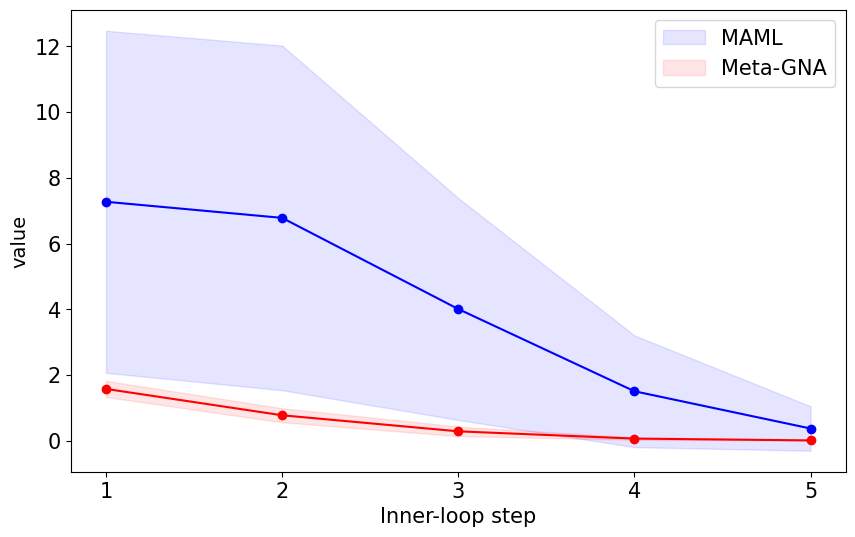

In [86]:
x = [1, 2, 3, 4, 5]

maml_mean_df = maml_info_mini_imagenet['loss_mean']
maml_std_devs = maml_info_mini_imagenet['loss_std']

arbiter_mean_df = arbiter_info_mini_imagenet['loss_mean']
arbitert_std_devs = arbiter_info_mini_imagenet['loss_std']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_mean_df - maml_std_devs, maml_mean_df + maml_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_mean_df - arbitert_std_devs, arbiter_mean_df + arbitert_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniImageNet_loss_distribution' + '.png')

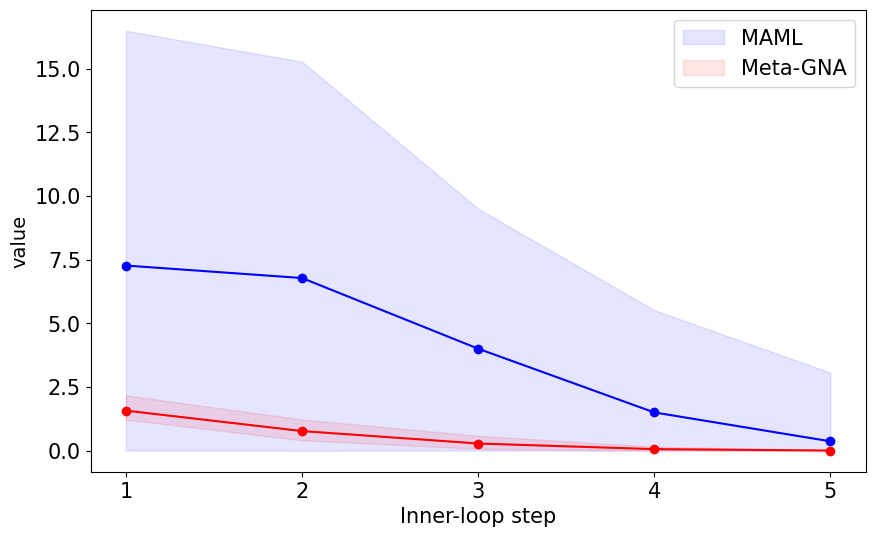

In [87]:
x = [1, 2, 3, 4, 5]

maml_mean_df = maml_info_mini_imagenet['loss_mean']
maml_max_df = maml_info_mini_imagenet['loss_max']
maml_min_df = maml_info_mini_imagenet['loss_min']

arbiter_mean_df = arbiter_info_mini_imagenet['loss_mean']
arbiter_max_df = arbiter_info_mini_imagenet['loss_max']
arbiter_min_devs = arbiter_info_mini_imagenet['loss_min']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_max_df, maml_min_df, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_max_df, arbiter_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniimagenet_min_max_loss_distribution' + '.png')

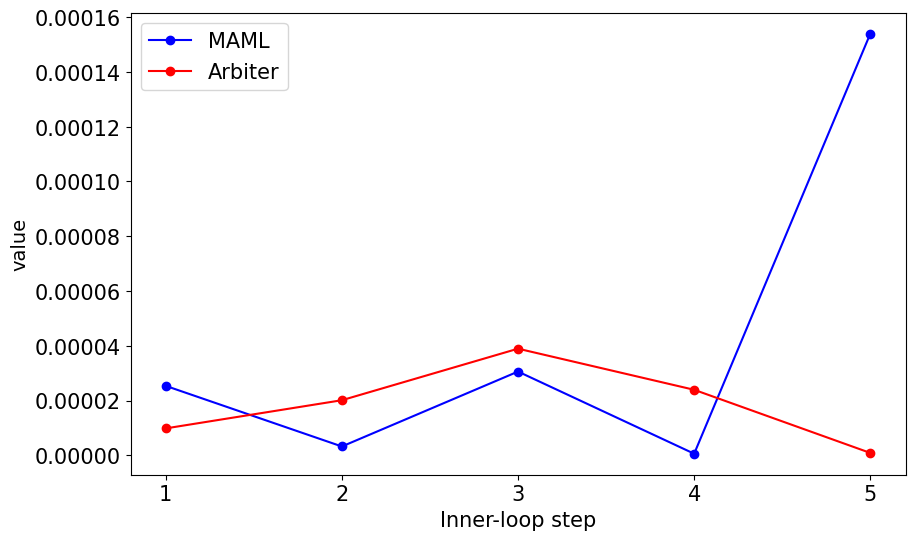

In [88]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_mini_imagenet['gsnr']
arbiter_mean_df = arbiter_info_mini_imagenet['gsnr']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# plt.title('GSNR')
plt.xticks(x, x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniImageNet_gsnr' + '.png')

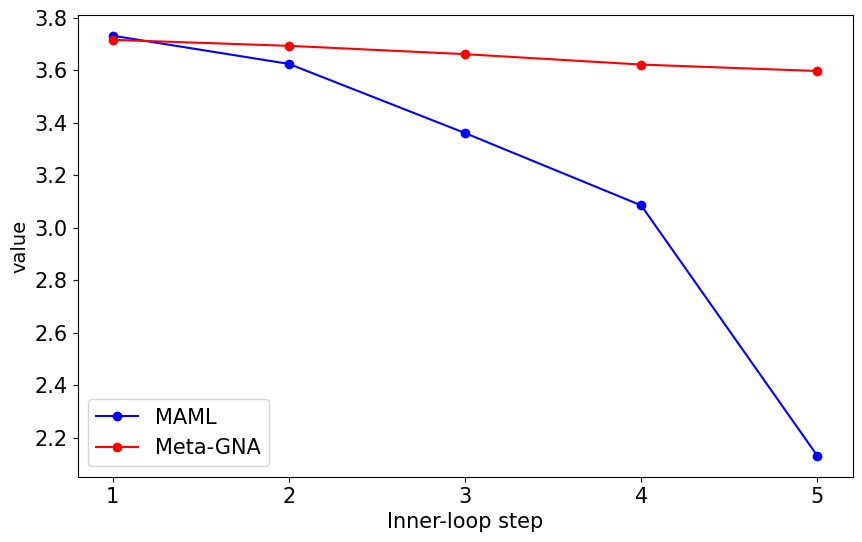

In [89]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_mini_imagenet['all_grads_l2norm']
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_l2norm']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

plt.legend()


# plt.title('Gradient Norm')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('miniImageNet_gradient_norm' + '.png')

# tiered_imagenet

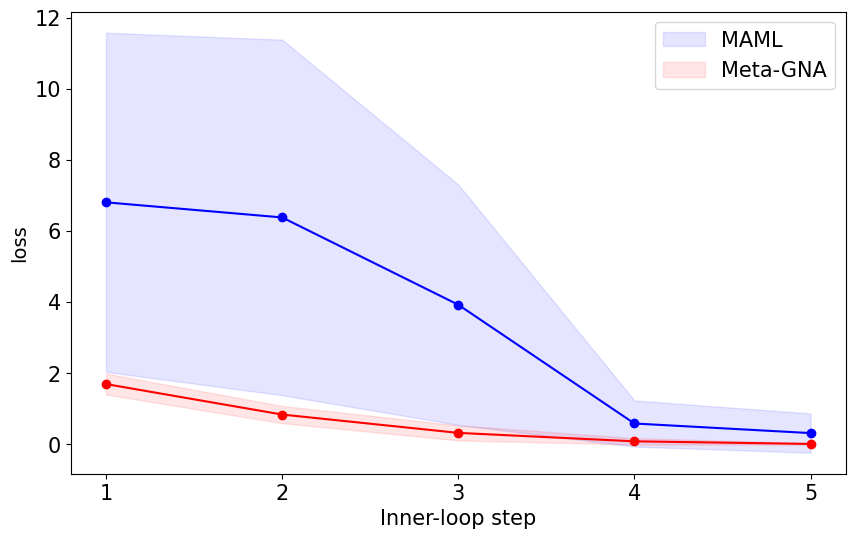

In [90]:
x = [1, 2, 3, 4, 5]
        
maml_tiered_imagenet_mean_df = maml_info_tiered_imagenet['loss_mean']
maml_tiered_imagenet_std_devs = maml_info_tiered_imagenet['loss_std']

arbiter_tiered_imagenet_mean_df = arbiter_info_tiered_imagenet['loss_mean']
arbiter_tiered_imagenet_std_devs = arbiter_info_tiered_imagenet['loss_std']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_tiered_imagenet_mean_df, '-o', color='b')
plt.fill_between(x, maml_tiered_imagenet_mean_df - maml_tiered_imagenet_std_devs, maml_tiered_imagenet_mean_df + maml_tiered_imagenet_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_tiered_imagenet_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_tiered_imagenet_mean_df - arbiter_tiered_imagenet_std_devs, arbiter_tiered_imagenet_mean_df + arbiter_tiered_imagenet_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_loss_distribution' + '.png')

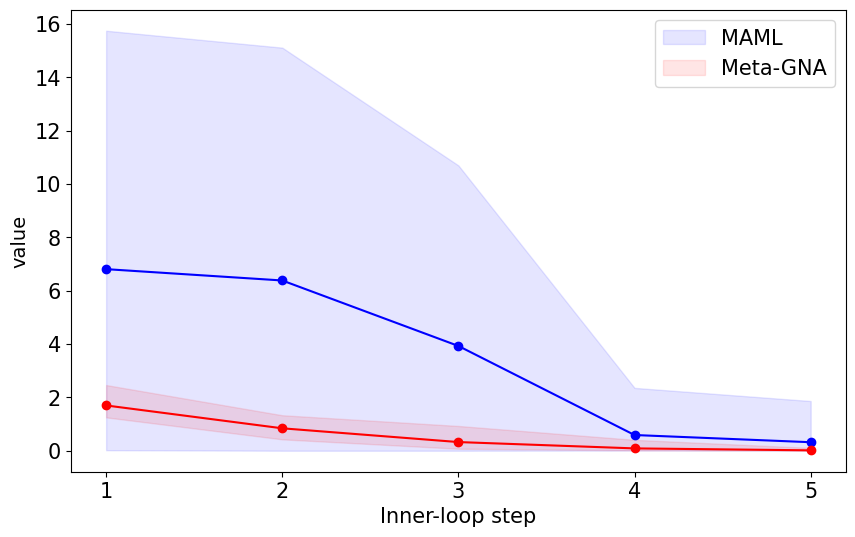

In [91]:
x = [1, 2, 3, 4, 5]

maml_mean_df = maml_info_tiered_imagenet['loss_mean']
maml_max_df = maml_info_tiered_imagenet['loss_max']
maml_min_df = maml_info_tiered_imagenet['loss_min']

arbiter_mean_df = arbiter_info_tiered_imagenet['loss_mean']
arbiter_max_df = arbiter_info_tiered_imagenet['loss_max']
arbiter_min_devs = arbiter_info_tiered_imagenet['loss_min']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_max_df, maml_min_df, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_max_df, arbiter_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_min_max_loss_distribution' + '.png')

<Figure size 1000x600 with 0 Axes>

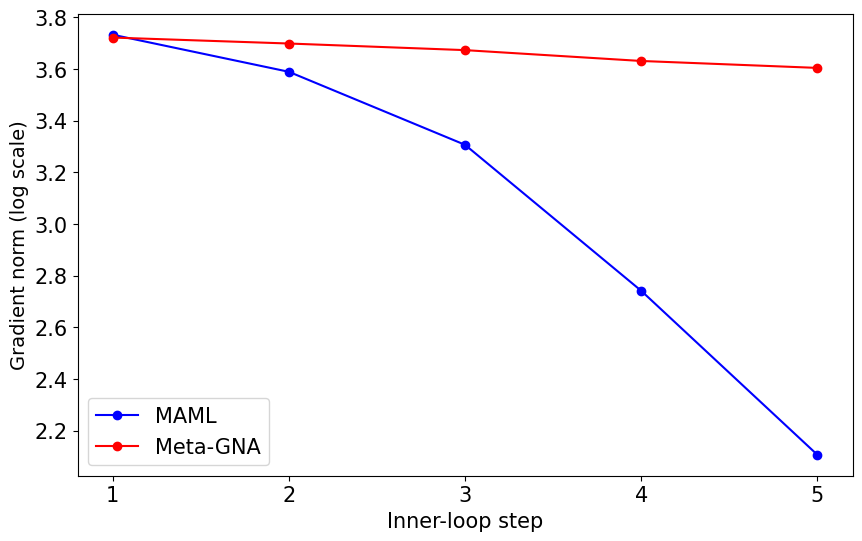

In [92]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_tiered_imagenet['all_grads_l2norm']
arbiter_mean_df = arbiter_info_tiered_imagenet['all_grads_l2norm']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

plt.figure(figsize=(10, 6))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

plt.legend()

# plt.title('Gradient Norm')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_gradient_norm' + '.png')

<Figure size 1000x600 with 0 Axes>

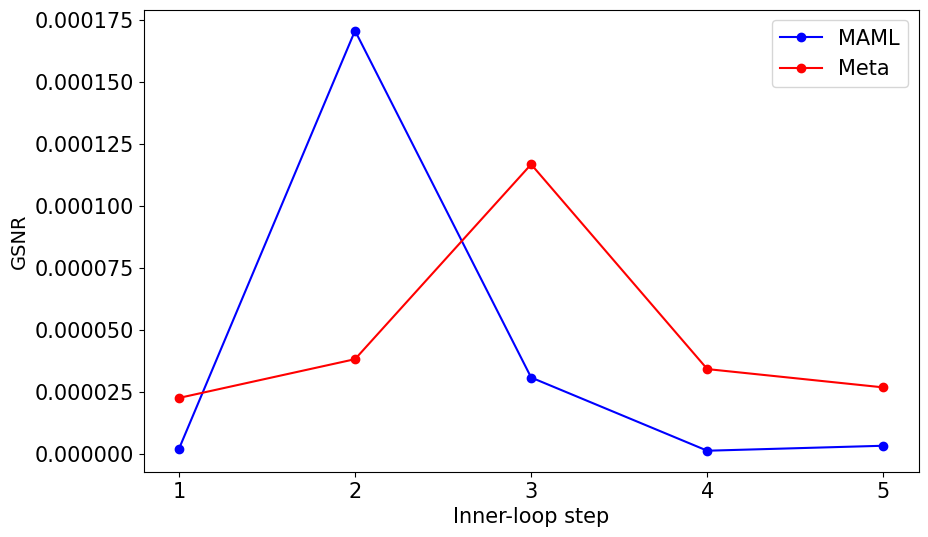

In [93]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_tiered_imagenet['gsnr']
arbiter_mean_df = arbiter_info_tiered_imagenet['gsnr']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

plt.figure(figsize=(10, 6))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta')

# plt.title('GSNR')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('GSNR', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('tiered_imagenet_gsnr' + '.png')

# CUB

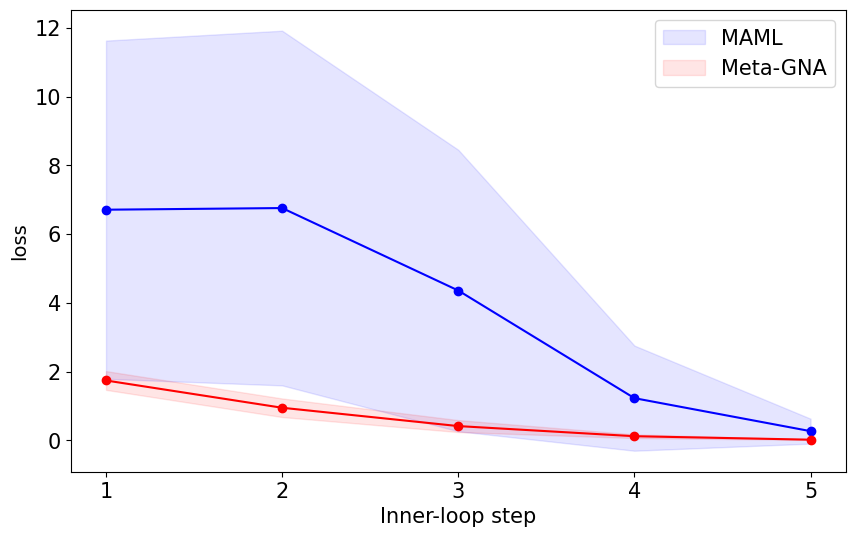

In [94]:
x = [1, 2, 3, 4, 5]
        
maml_CUB_mean_df = maml_info_CUB['loss_mean']
maml_CUB_std_devs = maml_info_CUB['loss_std']

arbiter_CUB_mean_df = arbiter_info_CUB['loss_mean']
arbiter_CUB_std_devs = arbiter_info_CUB['loss_std']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_CUB_mean_df, '-o', color='b')
plt.fill_between(x, maml_CUB_mean_df - maml_CUB_std_devs, maml_CUB_mean_df + maml_CUB_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_CUB_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_CUB_mean_df - arbiter_CUB_std_devs, arbiter_CUB_mean_df + arbiter_CUB_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_loss_distribution' + '.png')

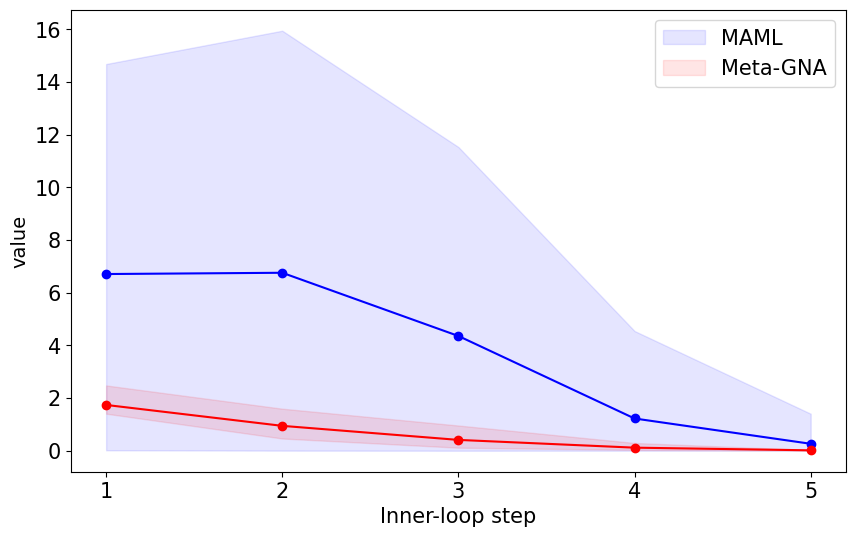

In [95]:
x = [1, 2, 3, 4, 5]

maml_mean_df = maml_info_CUB['loss_mean']
maml_max_df = maml_info_CUB['loss_max']
maml_min_df = maml_info_CUB['loss_min']

arbiter_mean_df = arbiter_info_CUB['loss_mean']
arbiter_max_df = arbiter_info_CUB['loss_max']
arbiter_min_devs = arbiter_info_CUB['loss_min']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_max_df, maml_min_df, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_max_df, arbiter_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_min_max_loss_distribution' + '.png')

<Figure size 1000x600 with 0 Axes>

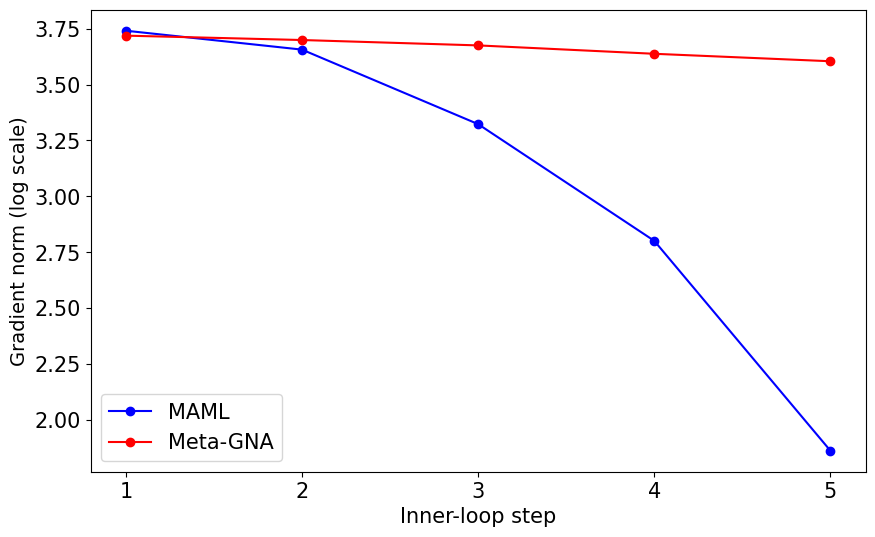

In [96]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_CUB['all_grads_l2norm']
arbiter_mean_df = arbiter_info_CUB['all_grads_l2norm']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

plt.figure(figsize=(10, 6))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

plt.legend()

# plt.title('Gradient Norm')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('Gradient norm (log scale)', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_gradient_norm' + '.png')

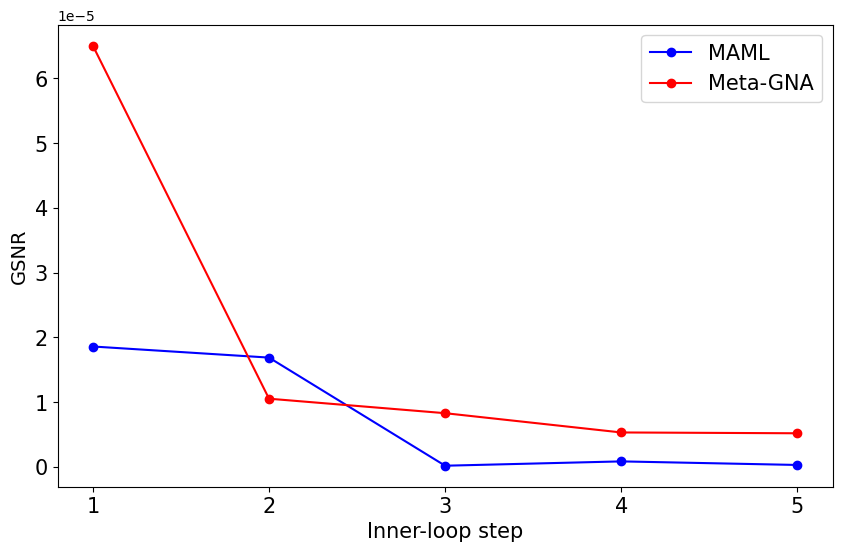

In [97]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_CUB['gsnr']
arbiter_mean_df = arbiter_info_CUB['gsnr']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Meta-GNA')

# plt.title('GSNR')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('GSNR', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CUB_gsnr' + '.png')

# CIFAR-FS

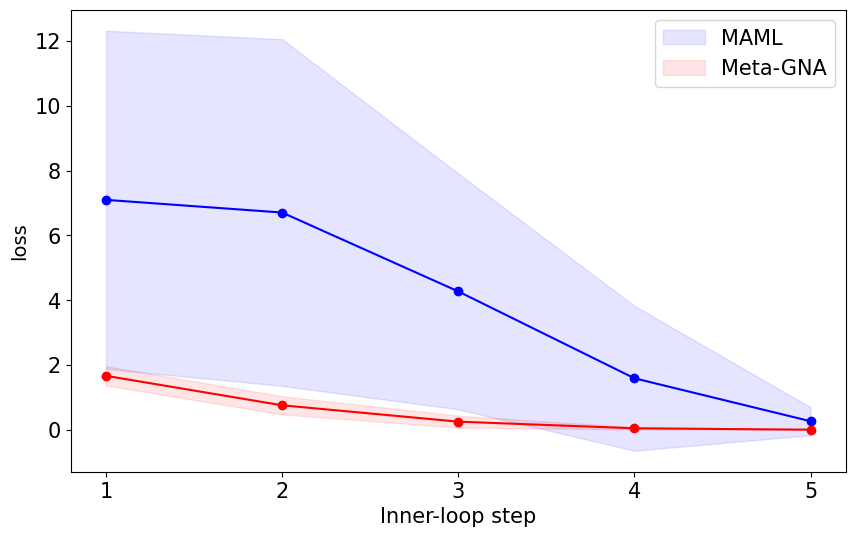

In [98]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_cifar_fs['loss_mean']
maml_std_devs = maml_info_cifar_fs['loss_std']

arbiter_mean_df = arbiter_info_CIFAR_FS['loss_mean']
arbiter_std_devs = arbiter_info_CIFAR_FS['loss_std']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_mean_df - maml_std_devs, maml_mean_df + maml_std_devs, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_mean_df - arbiter_std_devs, arbiter_mean_df + arbiter_std_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('loss', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CIFAR-FS_loss_distribution' + '.png')

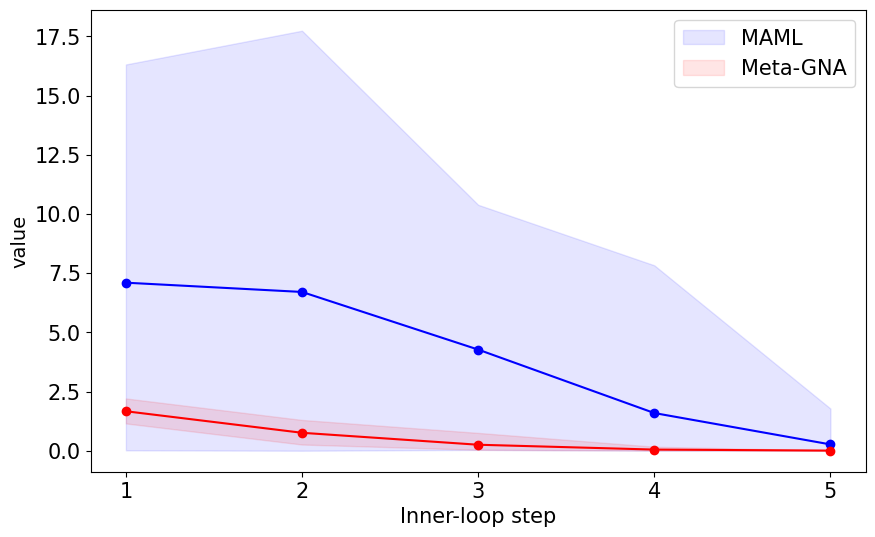

In [99]:
x = [1, 2, 3, 4, 5]

maml_mean_df = maml_info_cifar_fs['loss_mean']
maml_max_df = maml_info_cifar_fs['loss_max']
maml_min_df = maml_info_cifar_fs['loss_min']

arbiter_mean_df = arbiter_info_CIFAR_FS['loss_mean']
arbiter_max_df = arbiter_info_CIFAR_FS['loss_max']
arbiter_min_devs = arbiter_info_CIFAR_FS['loss_min']

plt.figure(figsize=(10, 6))

plt.plot(x, maml_mean_df, '-o', color='b')
plt.fill_between(x, maml_max_df, maml_min_df, color='b', alpha=0.1, label='MAML')

plt.plot(x, arbiter_mean_df, '-o', color='r')
plt.fill_between(x, arbiter_max_df, arbiter_min_devs, color='r', alpha=0.1, label='Meta-GNA')

# plt.title('Loss Distribution')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('cifar_fs_min_max_loss_distribution' + '.png')

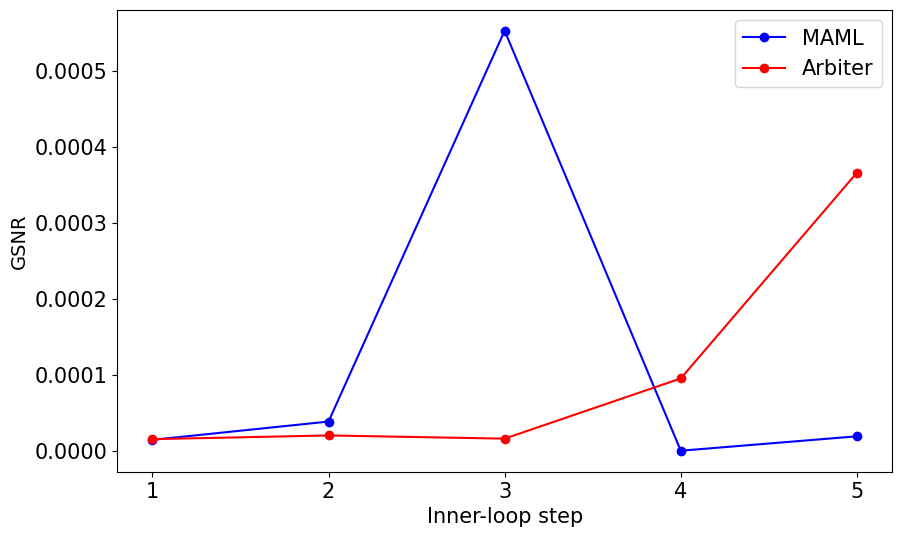

In [100]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_cifar_fs['gsnr']
arbiter_mean_df = arbiter_info_CIFAR_FS['gsnr']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values


# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# plt.title('GSNR')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('GSNR', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CIFAR-FS_gsnr' + '.png')

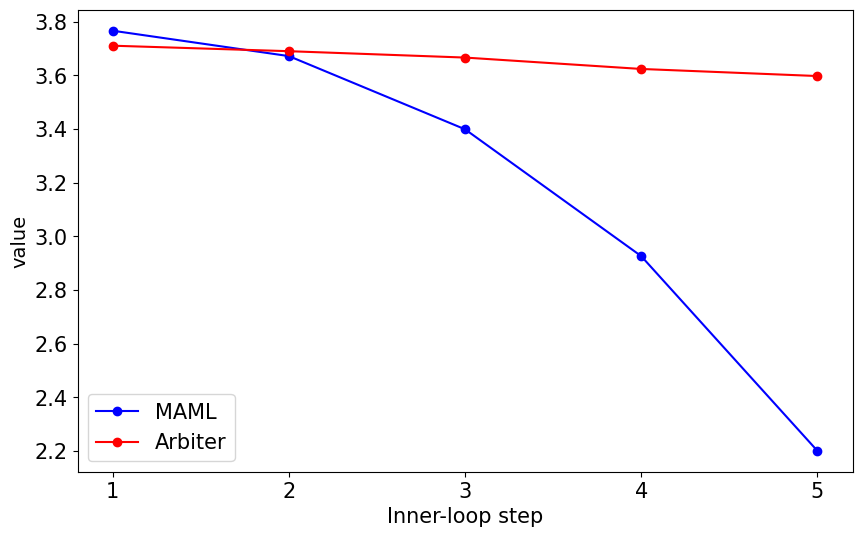

In [101]:
x = [1, 2, 3, 4, 5]
        
maml_mean_df = maml_info_cifar_fs['all_grads_l2norm']
arbiter_mean_df = arbiter_info_CIFAR_FS['all_grads_l2norm']

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

plt.legend()


# plt.title('Gradient Norm')
plt.xticks(x)
plt.legend(fontsize=15)
plt.xlabel('Inner-loop step',fontsize=15)
plt.ylabel('value', fontsize=14)
plt.xticks(fontsize=15)  # x축 값 크기
plt.yticks(fontsize=15)  # y축 값 크기

plt.savefig('CIFAR-FS_gradient_norm' + '.png')